### DRUG REVIEW SENTIMENT ANALYISIS



The Drug Review Dataset from the UCI Machine Learning Repository is utilized for this analysis. It contains 161,297 entries with the following 7 features:

•	drugName: The name of the drug.

•	condition: The medical condition for which the drug was prescribed.

•	review: The text review provided by the patient.


•	rating: A 10-star rating reflecting overall patient satisfaction.

•	date: The date the review was posted.

•	usefulCount: The number of users who found the review useful.


Target Variable: The sentiment of the review, which needs to be derived from the rating. A review rating above a certain threshold (e.g., 7/10) will be classified as positive, while a rating below this threshold will be classified as negative.However the rating provides a numerical representation of a user’s satisfaction (on a scale of 1 to 10) while the review text contains much richer, nuanced information that the rating alone cannot capture.

The objective of this project is to perform sentiment analysis on patient reviews for various drugs. The goal is to predict the sentiment (positive or negative) of reviews based on textual data and related features such as drug name, condition treated, and patient ratings. The sentiment prediction will help pharmaceutical companies and healthcare professionals gain insights into patient satisfaction, identify potential issues with drugs, and ultimately improve patient outcomes.

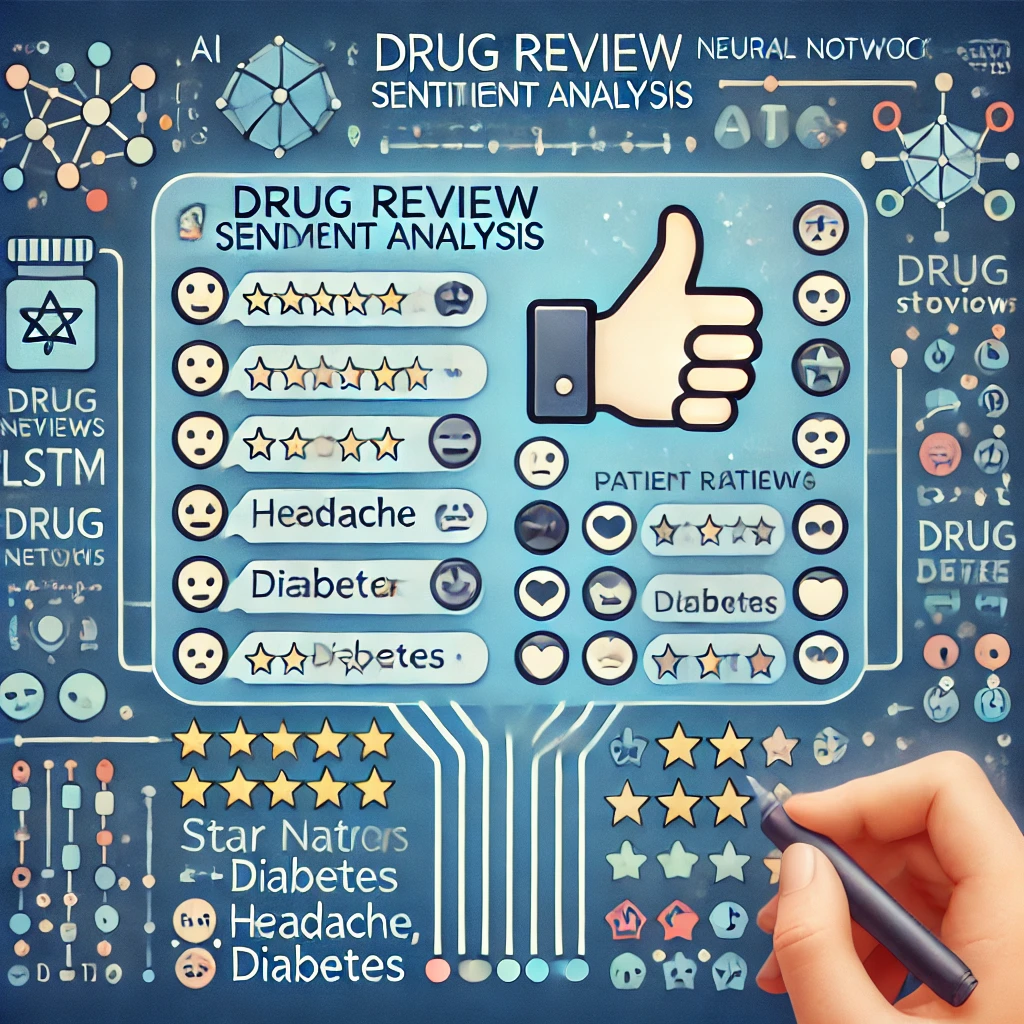

**Steps**
1. Data Collection, Exploration and Preprocessing
2. EDA
3. Pre-Modelling Data Preparation
4. Model Building
5. Model Evaluation
6. Summary

### DATA COLLECTION

In [35]:
# ## 1. Data Collection

# Import necessary libraries and modules
import torch  # Import the PyTorch library
from datetime import datetime  # Import the datetime module for time tracking
import gdown
import zipfile
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
import pandas as pd

# Replace 'path/to/your/file.tsv' with the actual path to your .tsv file
file_path1 = '/Users/swathi/SwathiPS/AI/projects/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_raw.tsv'
file_path2 = '/Users/swathi/SwathiPS/AI/projects/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTest_raw.tsv'
# Load the .tsv file into a DataFrame
train = pd.read_csv(file_path1, sep='\t', index_col=0)
test  = pd.read_csv(file_path2, sep='\t', index_col=0)

# Reset index and rename it to 'UniqueId'
train.reset_index(inplace=True)
test.reset_index(inplace=True)

train.rename(columns={'index': 'UniqueId'}, inplace=True)
test.rename(columns={'index': 'UniqueId'}, inplace=True)

# Display the first few rows of the DataFrame
train.head()


,UniqueId,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [69]:
# Check the shape of the train and test datasets
print("Shape of Training Data:", train.shape)
print("Shape of Testing Data:", test.shape)


Shape of Training Data: (161297, 9)
Shape of Testing Data: (53766, 8)


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UniqueId     161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [43]:
train.isnull().any()

UniqueId       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [44]:
print("unique values count of train : " ,len(set(train['UniqueId'].values)))
print("length of train : " ,train.shape[0])

unique values count of train :  161297
length of train :  161297


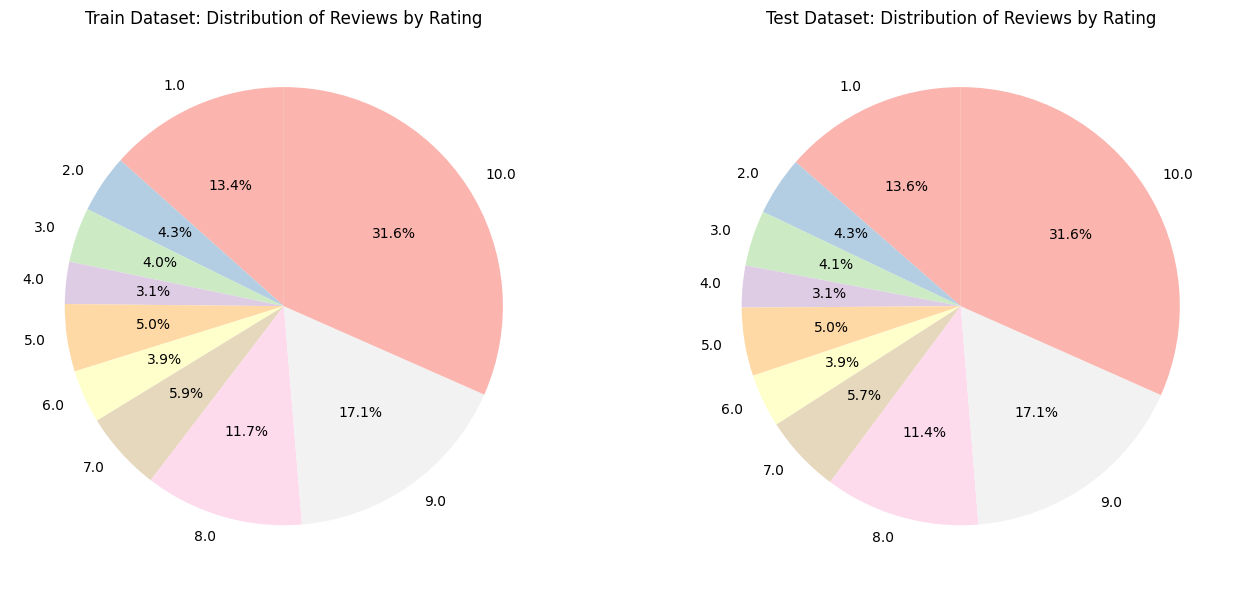

In [45]:
# Count the number of reviews for each rating in the train and test datasets
train_rating_counts = train['rating'].value_counts().sort_index()
test_rating_counts = test['rating'].value_counts().sort_index()

# Plotting pie charts for the distribution of ratings in both train and test datasets
plt.figure(figsize=(14, 6))

# Pie chart for the train dataset
plt.subplot(1, 2, 1)
plt.pie(train_rating_counts, labels=train_rating_counts.index, autopct='%1.1f%%', startangle=90, colors = plt.cm.Pastel1.colors)
plt.title('Train Dataset: Distribution of Reviews by Rating')

# Pie chart for the test dataset
plt.subplot(1, 2, 2)
plt.pie(test_rating_counts, labels=test_rating_counts.index, autopct='%1.1f%%', startangle=90, colors = plt.cm.Pastel1.colors)
plt.title('Test Dataset: Distribution of Reviews by Rating')

plt.tight_layout()
plt.show()


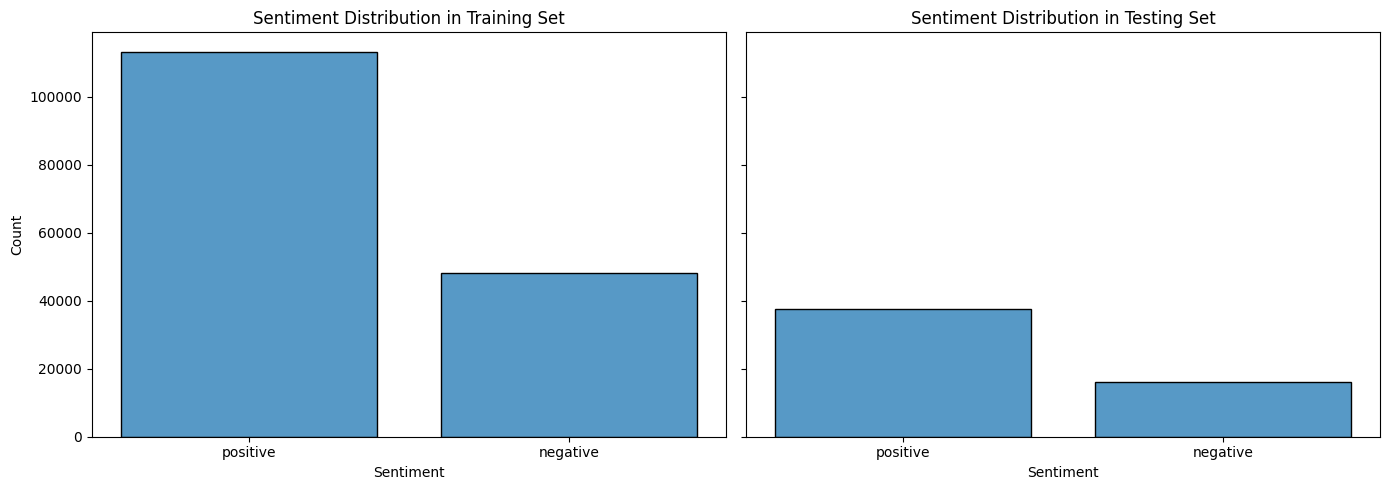

In [46]:

# Create the 'sentiment' feature in both datasets
train['sentiment'] = train['rating'].apply(lambda x: 'positive' if x >= 6 else 'negative')
test['sentiment'] = test['rating'].apply(lambda x: 'positive' if x >= 6 else 'negative')

# Create side-by-side histograms for train and test datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for the training set
sns.histplot(train['sentiment'], bins=2, shrink=0.8, ax=axes[0])
axes[0].set_title('Sentiment Distribution in Training Set')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Plot for the testing set
sns.histplot(test['sentiment'], bins=2, shrink=0.8, ax=axes[1])
axes[1].set_title('Sentiment Distribution in Testing Set')
axes[1].set_xlabel('Sentiment')

# Display the plots
plt.tight_layout()
plt.show()

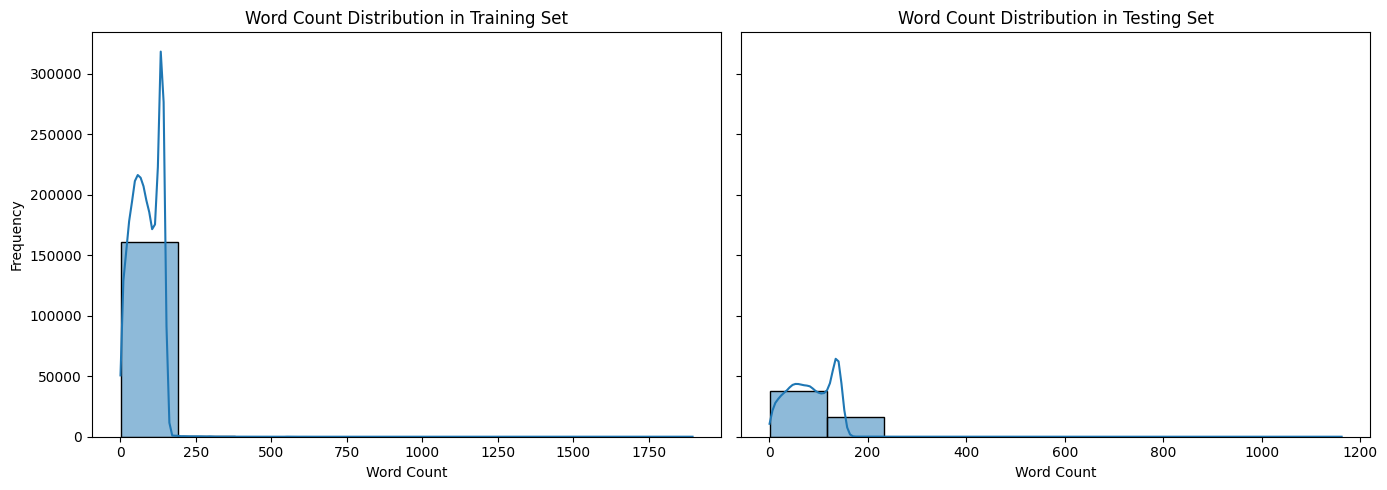

In [47]:
# Calculate the word count directly during plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for the training set
sns.histplot(train['review'].dropna().apply(lambda x: len(str(x).split())), 
             bins=10, kde=True, ax=axes[0])
axes[0].set_title('Word Count Distribution in Training Set')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Plot for the testing set
sns.histplot(test['review'].dropna().apply(lambda x: len(str(x).split())), 
             bins=10, kde=True, ax=axes[1])
axes[1].set_title('Word Count Distribution in Testing Set')
axes[1].set_xlabel('Word Count')

# Display the plots
plt.tight_layout()
plt.show()

In [67]:
# Step 1: Filter reviews with word count less than 50 in the train set
train_filtered = train[train['review'].apply(lambda x: len(str(x).split()) > 400)]

# Step 2: Filter reviews with word count less than 50 in the test set
test_filtered = test[test['review'].apply(lambda x: len(str(x).split()) > 400)]

# Display the filtered datasets' sizes
print(f"Number of reviews with word count < 50 in train set: {train_filtered.shape[0]}")
print(f"Number of reviews with word count < 50 in test set: {test_filtered.shape[0]}")

Number of reviews with word count < 50 in train set: 55
Number of reviews with word count < 50 in test set: 10


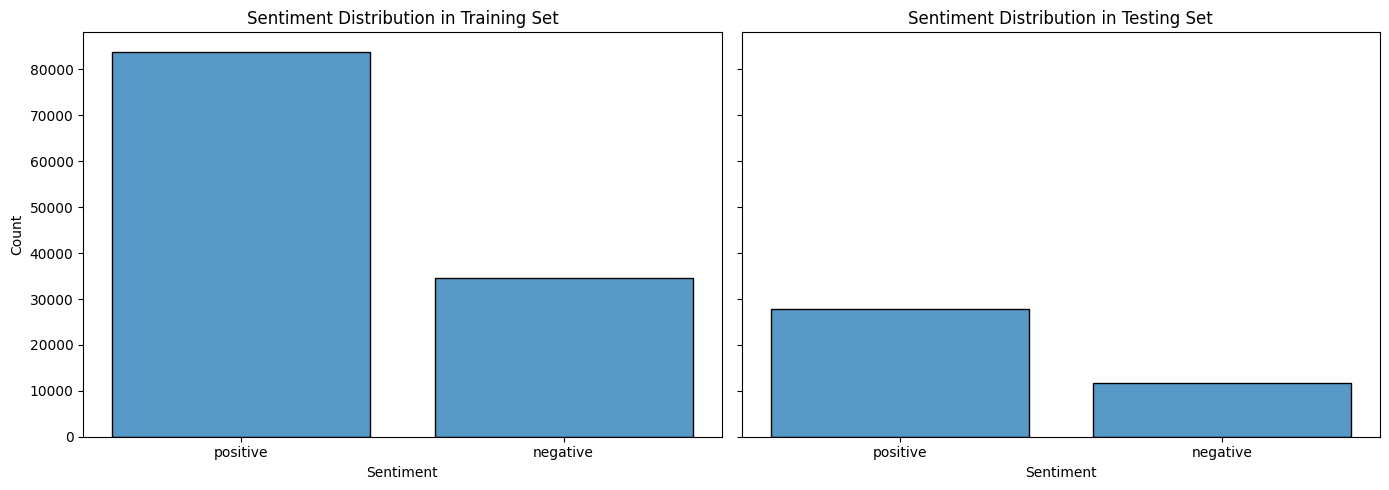

In [68]:
train_left = train[train['review'].apply(lambda x: len(str(x).split()) > 50)]
test_left = test[test['review'].apply(lambda x: len(str(x).split()) > 50)]

# Create side-by-side histograms for train and test datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for the training set
sns.histplot(train_left['sentiment'], bins=2, shrink=0.8, ax=axes[0])
axes[0].set_title('Sentiment Distribution in Training Set')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Plot for the testing set
sns.histplot(test_left['sentiment'], bins=2, shrink=0.8, ax=axes[1])
axes[1].set_title('Sentiment Distribution in Testing Set')
axes[1].set_xlabel('Sentiment')

# Display the plots
plt.tight_layout()
plt.show()

In [52]:
train.head()

,UniqueId,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,negative
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive


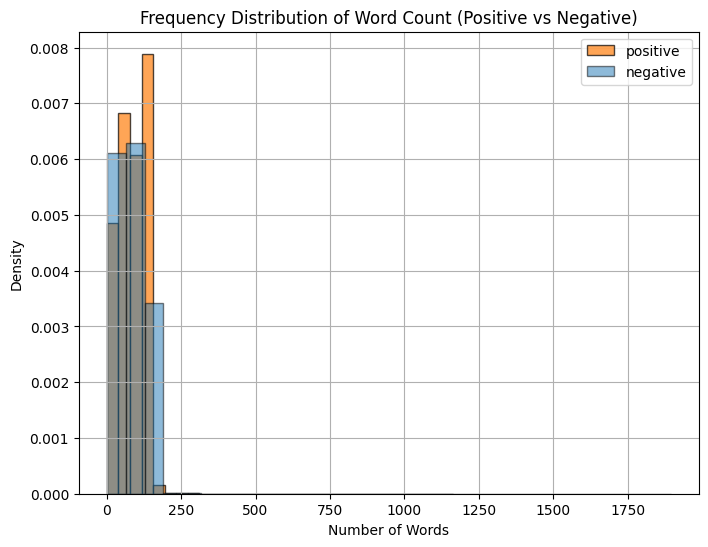

In [56]:
plt.figure(figsize=(8, 6))

# Calculate the number of words in each review
train['word_count'] = train['review'].apply(lambda x: len(str(x).split()))

# Filter reviews into positive and negative categories
pos_reviews = train[train['sentiment'] == 'positive']['word_count']
neg_reviews = train[train['sentiment'] == 'negative']['word_count']

plt.hist(pos_reviews, bins=30, color='#ff7f0e', edgecolor='black', alpha=0.7, label='positive', density=True)
plt.hist(neg_reviews, bins=30, color='#1f77b4', edgecolor='black', alpha=0.5, label='negative', density=True)

plt.title('Frequency Distribution of Word Count (Positive vs Negative)')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### DATA PREPROCESSING

In [25]:
import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
positive = train[train['sentiment'] == 'positive']
negative = train[train['sentiment'] == 'negative']

# Perform random oversampling for the minority class
negative_oversampled = resample(negative,
                                replace=True,     # Sample with replacement
                                n_samples=len(positive),  # Match number in majority class
                                random_state=42)  # For reproducibility

# Combine the oversampled minority class with the majority class
train_balanced = pd.concat([positive, negative_oversampled])

# Shuffle the dataset
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(train_balanced['sentiment'].value_counts())

sentiment
positive    113209
negative    113209
Name: count, dtype: int64


In [70]:
import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
positive = test[test['sentiment'] == 'positive']
negative = test[test['sentiment'] == 'negative']

# Perform random oversampling for the minority class
negative_oversampled = resample(negative,
                                replace=True,     # Sample with replacement
                                n_samples=len(positive),  # Match number in majority class
                                random_state=42)  # For reproducibility

# Combine the oversampled minority class with the majority class
test_balanced = pd.concat([positive, negative_oversampled])

# Shuffle the dataset
test_balanced = test_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(train_balanced['sentiment'].value_counts())

sentiment
positive    113209
negative    113209
Name: count, dtype: int64


In [58]:
print(train['review'][1])

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."


first, noticeable parts are the html strings like \ r \ n, and the parts that express emotions in parentheses such as (very unusual for him) and (a good thing) and words in capital letters like MUCH

In [59]:
print(train['review'][9])

"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."


There are some words like doesn&#039;t in the above review.These needs removal in preprocessing as well. 
Next, we will classify 1 ~ 5 as negative, and 6 ~ 10 as positive, and we will check through 1 ~ 4 grams which corpus best classifies emotions.

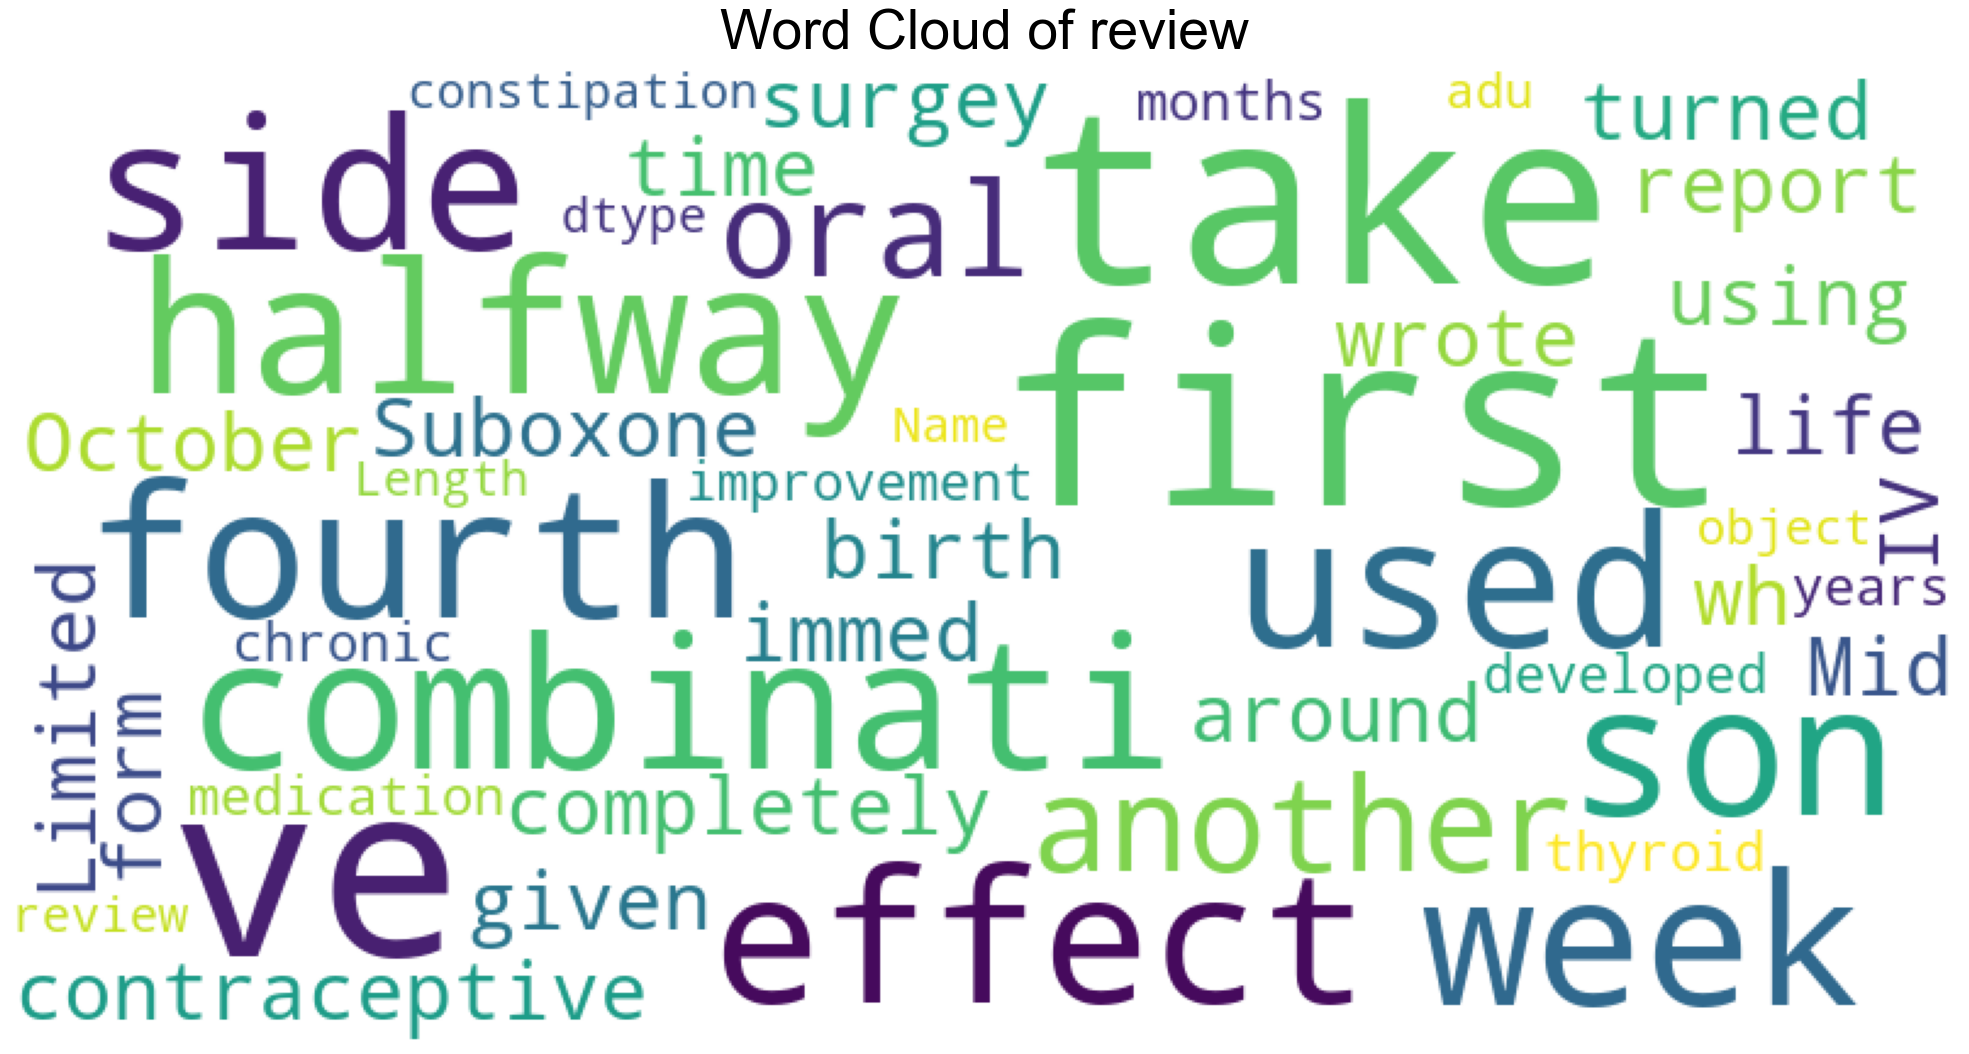

In [88]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc kernel 
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(20.0,12.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(train["review"], title="Word Cloud of review")